In [11]:
# importing data...

LOCAL = '../data/nyc/nyc-rent-2016.csv'
WEB = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/nyc/nyc-rent-2016.csv'

import pandas as pd
df = pd.read_csv(WEB)

In [12]:
# creating month column for eventual test/train split...

df['created'] = pd.to_datetime(df['created'], infer_datetime_format=True)
df['month'] = df['created'].dt.month

In [13]:
# let's see what we can do with the non-numeric columns...

df.describe(exclude = 'number')

,created,description,display_address,street_address,interest_level
count,48300,46879,48168,48290,48300
unique,47643,37490,8691,15093,3
top,2016-06-12 13:20:45,,Broadway,3333 Broadway,low
freq,3,1614,424,174,33270
first,2016-04-01 22:12:41,NaN,NaN,NaN,NaN
last,2016-06-29 21:41:47,NaN,NaN,NaN,NaN


In [14]:
# let's make interest_level numeric...

df['interest_level'] = df['interest_level'].replace(
    {'high': 3, 'medium': 2, 'low': 1})

In [15]:
# let's also add a column with description length...

df['description_length'] = df['description'].str.len()
df['description_length'] = df['description_length'].fillna(0)

In [16]:
# and let's combine cats_allowed and dogs_allowed into pets_allowed...

import numpy as np

df['pets_allowed'] = np.where(((df['cats_allowed'] == 1) |
                               (df['dogs_allowed'] == 1)), 1, 0)

df = df.drop(columns=['cats_allowed', 'dogs_allowed'])

Train Root Mean Squared Error: 818.7320178088545
Train Mean Absolute Error: 579.3698895258776
Train R^2 Score: 0.657226852748489 

Test Root Mean Squared Error: 844.6060925295684
Test Mean Absolute Error: 592.0555564164101
Test R^2 Score: 0.6396211660085492 

Intercept	  3432.7534190069314
loft                     4.940963
swimming_pool            7.216925
exclusive               10.740470
balcony                  1.115794
outdoor_space          -28.337991
wheelchair_access       19.238219
terrace                 18.922734
dining_room             26.110976
pets_allowed            26.397336
pre-war                -34.446897
new_construction       -36.508813
fitness_center          31.342189
roof_deck              -44.467090
laundry_in_building    -41.258366
dishwasher              45.773369
hardwood_floors        -72.375870
elevator                93.924344
high_speed_internet    -73.447628
doorman                188.329471
bathrooms              519.235898
laundry_in_unit        132.55

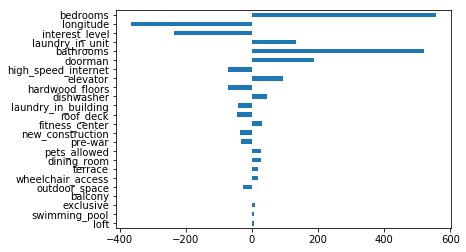

In [21]:
# finding ideal feature selection for n features, printing mean absolute 
# error, and printing model coefficients and intercept...

import itertools
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings; warnings.simplefilter('ignore')

features = df.drop(
    columns='price').describe(
    include = 'number').columns.tolist()
target = 'price'

train = df.query('month < 6')
test = df.query('month == 6')

keeper_features = ['swimming_pool',
                   'exclusive',
                   'balcony',
                   'outdoor_space',
                   'wheelchair_access',
                   'terrace',
                   'dining_room',
                   'pets_allowed',
                   'pre-war',
                   'new_construction',
                   'fitness_center',
                   'roof_deck',
                   'laundry_in_building',
                   'dishwasher',
                   'hardwood_floors',
                   'elevator',
                   'high_speed_internet',
                   'doorman',
                   'bathrooms',
                   'laundry_in_unit',
                   'interest_level',
                   'longitude',
                   'bedrooms']
other_features = [elem for elem in features if elem not in keeper_features]

other_features_combo = list(itertools.combinations(other_features, 1))

dictionary = {}
for i in range(len(other_features_combo)):
    X_train = train[list(other_features_combo[i]) + keeper_features]
    y_train = train[target]
    
    X_test = test[list(other_features_combo[i]) + keeper_features]
    y_test = test[target]
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    dictionary.update({other_features_combo[i]:
                       mean_absolute_error(y_test, y_pred)})

best_new_features_combo = min(dictionary, key=dictionary.get)

X_train = train[list(best_new_features_combo) + keeper_features]
y_train = train[target]
    
X_test = test[list(best_new_features_combo) + keeper_features]
y_test = test[target]
    
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('Train Root Mean Squared Error:',
      np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('Train Mean Absolute Error:',
      mean_absolute_error(y_train, y_pred_train))
print('Train R^2 Score:',
      r2_score(y_train, y_pred_train), '\n')

print('Test Root Mean Squared Error:',
      np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('Test Mean Absolute Error:',
      mean_absolute_error(y_test, y_pred_test))
print('Test R^2 Score:',
      r2_score(y_test, y_pred_test), '\n')

print('Intercept\t ', model.intercept_)    
print(pd.Series(model.coef_, list(best_new_features_combo) + keeper_features))

pd.Series(model.coef_, list(
    best_new_features_combo) + keeper_features).plot.barh();
plt.show()

Train Root Mean Squared Error: 818.7320178088545
Train Mean Absolute Error: 579.3698895258776
Train R^2 Score: 0.657226852748489 

Test Root Mean Squared Error: 844.6060925295684
Test Mean Absolute Error: 592.0555564164101
Test R^2 Score: 0.6396211660085492 

Intercept	  3432.7534190069314
loft                     4.940963
swimming_pool            7.216925
exclusive               10.740470
balcony                  1.115794
outdoor_space          -28.337991
wheelchair_access       19.238219
terrace                 18.922734
dining_room             26.110976
pets_allowed            26.397336
pre-war                -34.446897
new_construction       -36.508813
fitness_center          31.342189
roof_deck              -44.467090
laundry_in_building    -41.258366
dishwasher              45.773369
hardwood_floors        -72.375870
elevator                93.924344
high_speed_internet    -73.447628
doorman                188.329471
bathrooms              519.235898
laundry_in_unit        132.55

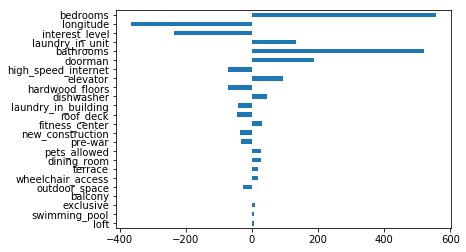

In [22]:
# same model as above, but without code for tinkering with model:

target = 'price'
features = ['loft',
            'swimming_pool',
            'exclusive',
            'balcony',
            'outdoor_space',
            'wheelchair_access',
            'terrace',
            'dining_room',
            'pets_allowed',
            'pre-war',
            'new_construction',
            'fitness_center',
            'roof_deck',
            'laundry_in_building',
            'dishwasher',
            'hardwood_floors',
            'elevator',
            'high_speed_internet',
            'doorman',
            'bathrooms',
            'laundry_in_unit',
            'interest_level',
            'longitude',
            'bedrooms']

X_train = train[features]
y_train = train[target]
    
X_test = test[features]
y_test = test[target]
    
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('Train Root Mean Squared Error:',
      np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('Train Mean Absolute Error:',
      mean_absolute_error(y_train, y_pred_train))
print('Train R^2 Score:',
      r2_score(y_train, y_pred_train), '\n')

print('Test Root Mean Squared Error:',
      np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('Test Mean Absolute Error:',
      mean_absolute_error(y_test, y_pred_test))
print('Test R^2 Score:',
      r2_score(y_test, y_pred_test), '\n')

print('Intercept\t ', model.intercept_)    
print(pd.Series(model.coef_, features))

pd.Series(model.coef_, list(
    best_new_features_combo) + keeper_features).plot.barh();
plt.show()

Train Root Mean Squared Error: 1001.3152117907539
Train Mean Absolute Error: 742.4730386535007
Train R^2 Score: 0.4872981660077096 

Test Root Mean Squared Error: 1016.6366857082547
Test Mean Absolute Error: 751.901601621636
Test R^2 Score: 0.4778654752692787 

Intercept	  3432.753419006948
bathrooms    870.032613
longitude   -422.370546
dtype: float64


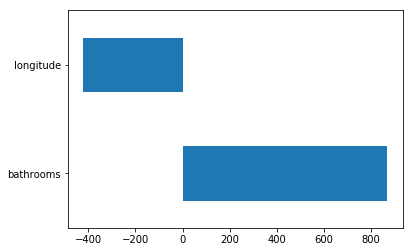

In [23]:
# now finding ideal feature selection for two features...

import itertools
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings; warnings.simplefilter('ignore')

features = df.drop(
    columns='price').describe(
    include = 'number').columns.tolist()
target = 'price'

train = df.query('month < 6')
test = df.query('month == 6')

keeper_features = []
other_features = [elem for elem in features if elem not in keeper_features]

other_features_combo = list(itertools.combinations(other_features, 2))

dictionary = {}
for i in range(len(other_features_combo)):
    X_train = train[list(other_features_combo[i]) + keeper_features]
    y_train = train[target]
    
    X_test = test[list(other_features_combo[i]) + keeper_features]
    y_test = test[target]
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    dictionary.update({other_features_combo[i]:
                       mean_absolute_error(y_test, y_pred)})

best_new_features_combo = min(dictionary, key=dictionary.get)

X_train = train[list(best_new_features_combo) + keeper_features]
y_train = train[target]
    
X_test = test[list(best_new_features_combo) + keeper_features]
y_test = test[target]
    
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('Train Root Mean Squared Error:',
      np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('Train Mean Absolute Error:',
      mean_absolute_error(y_train, y_pred_train))
print('Train R^2 Score:',
      r2_score(y_train, y_pred_train), '\n')

print('Test Root Mean Squared Error:',
      np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('Test Mean Absolute Error:',
      mean_absolute_error(y_test, y_pred_test))
print('Test R^2 Score:',
      r2_score(y_test, y_pred_test), '\n')

print('Intercept\t ', model.intercept_)    
print(pd.Series(model.coef_, list(best_new_features_combo) + keeper_features))

pd.Series(model.coef_, list(
    best_new_features_combo) + keeper_features).plot.barh();

Train Root Mean Squared Error: 1001.3152117907539
Train Mean Absolute Error: 742.4730386535007
Train R^2 Score: 0.4872981660077096 

Test Root Mean Squared Error: 1016.6366857082547
Test Mean Absolute Error: 751.901601621636
Test R^2 Score: 0.4778654752692787 

Intercept	  3432.753419006948
bathrooms    870.032613
longitude   -422.370546
dtype: float64


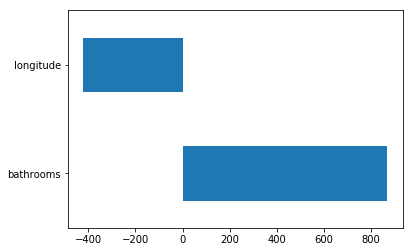

In [25]:
# again, same model as above, but without code for tinkering with model:

target = 'price'
features = ['bathrooms',
            'longitude']

X_train = train[features]
y_train = train[target]
    
X_test = test[features]
y_test = test[target]
    
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('Train Root Mean Squared Error:',
      np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('Train Mean Absolute Error:',
      mean_absolute_error(y_train, y_pred_train))
print('Train R^2 Score:',
      r2_score(y_train, y_pred_train), '\n')

print('Test Root Mean Squared Error:',
      np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('Test Mean Absolute Error:',
      mean_absolute_error(y_test, y_pred_test))
print('Test R^2 Score:',
      r2_score(y_test, y_pred_test), '\n')

print('Intercept\t ', model.intercept_)    
print(pd.Series(model.coef_, features))

pd.Series(model.coef_, list(
    best_new_features_combo) + keeper_features).plot.barh();
plt.show()

In [36]:
# 3D visualization of two-feature model:

import itertools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
    
def viz3D(fitted_model, X, features, target='', num=100):
    """
    Visualize model predictions in 3D, for regression model fit on 2 features
    
    Parameters
    ----------
    fitted_model : scikit-learn model, already fitted
    X : pandas dataframe, which was used to fit model
    features : list of strings, column names of the 2 features
    target : string, name of target
    num : int, number of grid points for each feature
    
    References
    ----------
    https://plot.ly/python/3d-charts/
    """
    feature1, feature2 = features
    min1, max1 = X[feature1].min(), X[feature1].max()
    min2, max2 = X[feature2].min(), X[feature2].max()
    x1 = np.linspace(min1, max1, num)
    x2 = np.linspace(min2, max2, num)
    combos = list(itertools.product(x1, x2))
    Z = fitted_model.predict(combos).reshape(num, num)
    
    configure_plotly_browser_state()
    data = [go.Surface(x=x1, y=x2, z=Z)]
    layout = go.Layout(
        scene={'xaxis': {'title': feature1, 'range': [min1,max1], 'showticklabels': True}, 
               'yaxis': {'title': feature2, 'range': [min2,max2], 'showticklabels': True}, 
               'zaxis': {'title': target, 'showticklabels': True}}, 
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

viz3D(model, pd.DataFrame(data=X_train, columns=['bathrooms','longitude']), features, target)